In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
# Load Model
model = tf.keras.models.load_model('/home/mothikaa/ANPR/models/object_detection.h5')
print('model loaded successfully')

model loaded successfully


In [4]:
path = '/home/mothikaa/ANPR/test_images/203.jpg'
image = load_img(path)
image = np.array(image,dtype=np.uint8)  # 8 bit array
image1 = load_img(path,target_size=(224,224))
# Convert into array and get the normalized output
image_arr_224 = img_to_array(image1)/255.0

In [5]:
# Size of the original image
h,w,d = image.shape
print('Height of the Image =',h)
print('Width of the Image =',w)

Height of the Image = 518
Width of the Image = 1024


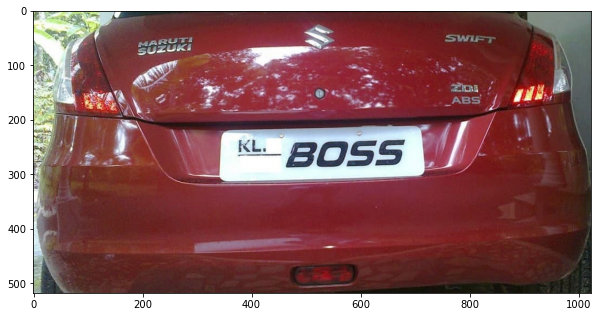

In [6]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [7]:
image_arr_224.shape

(224, 224, 3)

In [8]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [9]:
# Make predictions
coords = model.predict(test_arr)
coords

array([[0.38376307, 0.8702466 , 0.62005734, 0.227788  ]], dtype=float32)

In [10]:
# Denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[392.97338867, 891.13250732, 321.18970442, 117.99418467]])

In [11]:
coords = coords.astype(np.int32)
coords

array([[392, 891, 321, 117]], dtype=int32)

# Bounding Box

(392, 321) (891, 117)


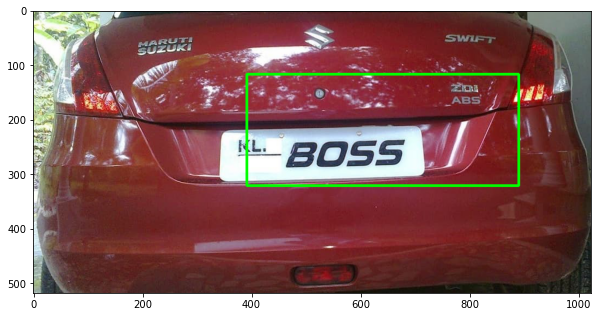

In [12]:
# draw bounding on the top of the image
xmin,xmax,ymin,ymax = coords[0]
pt1 = (xmin,ymin)
pt2 = (xmax,ymax)
print(pt1,pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# Create pipeline

In [13]:
path = '/home/mothikaa/ANPR/test_images/203.jpg'
def object_detection(path):
    # Read the image
    image = load_img(path)
    image = np.array(image,dtype=np.uint8)  # 8 bit array
    image1 = load_img(path,target_size=(224,224))
    # Data Preprocessing
    image_arr_224 = img_to_array(image1)/255.0
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    # make predictions
    coords = model.predict(test_arr)
    coords
    # Denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords
    coords = coords.astype(np.int32)
    coords
    # draw bounding on top of the image
    xmin,xmax,ymin,ymax = coords[0]
    pt1 = (xmin,ymin)
    pt2 = (xmax,ymax)
    print(pt1,pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

(392, 321) (891, 117)


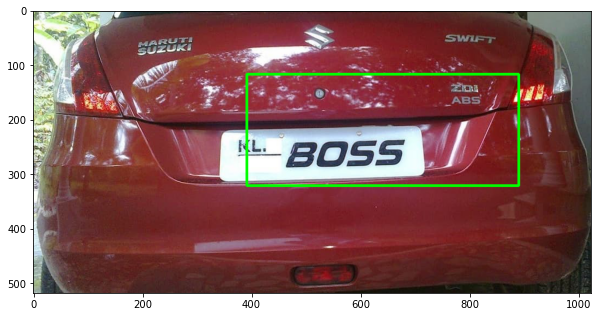

In [14]:
path = '/home/mothikaa/ANPR/test_images/203.jpg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# Optical character recognition - OCR

In [15]:
import pytesseract as pt

In [16]:
img = np.array(load_img(path))
xmin,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

ValueError: zero-size array to reduction operation minimum which has no identity

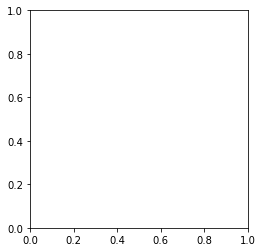

In [17]:
plt.imshow(roi)
plt.show()

# Extract text from image

In [ ]:
text = pt.image_to_string(roi)
print(text)